In [1]:
# In this exercise, we want to explore supervised learning the way we did in class, and build models
# we can run on a micro-controller like the ESP 32. To run this exercise, you will need Python 3.x and
# Jupyter notebook. One way is to use Jupyter online (see at https://jupyter.org), another one is to 
# install Jupyter notebook on your computer, a third way is to install the Anaconda navigator on your computer.
# This third way is of course better suited for those who will want to work further with ML
# (see at https://anaconda.org/anaconda/anaconda-navigator). Choose a way and proceed with Jupyter.
# Note: in Jupyter, 'enter' gets you another line in the same block. "Shift enter" executes the current block.

In [2]:
#First, let's import some libraries we will need for our computation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#Next, let's import our training set. In your case, the path will be different, modify to match your path to unconv_MV_v5.csv
df = pd.read_csv('/Users/jerhenry/Documents/Perso/IMT/IMT_ML_IoT/unconv_MV_v5.csv');

Text(0, 0.5, 'Pressure (Prod)')

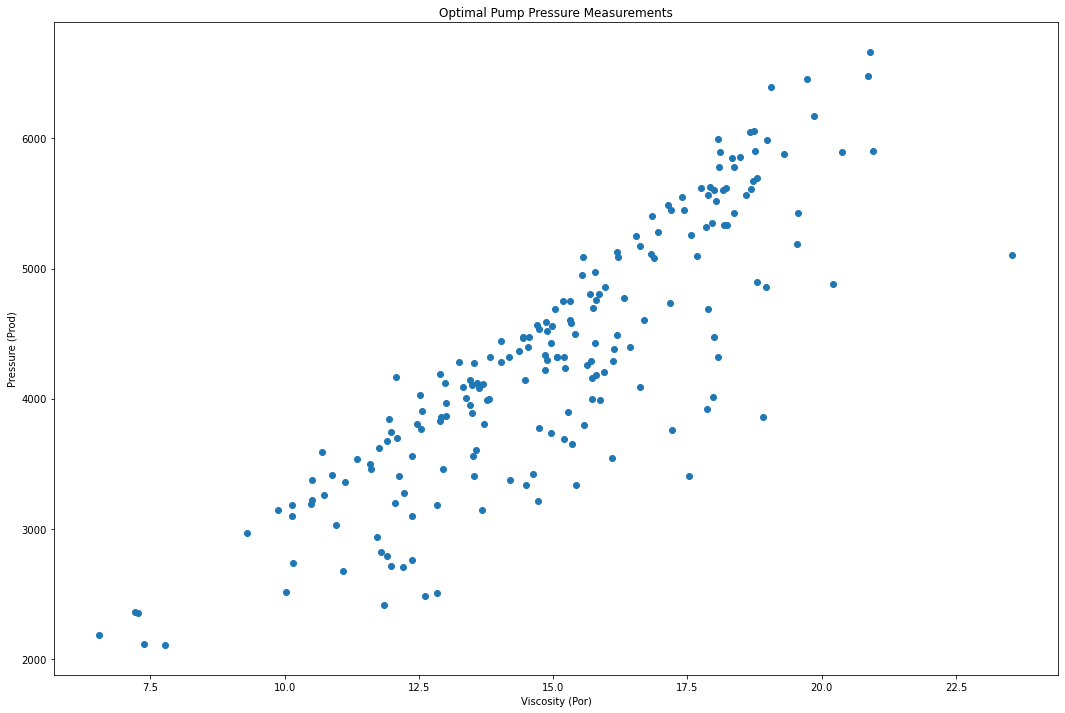

In [4]:
# A good first step is to look at your data, we plot an 18 by 12 figure
plt.figure(figsize=(18,12))
# we plot with the x axis taken from the viscosity, Por, and the y axis taken from the pressure, Prod
plt.plot(df[['Por']], df[['Prod']], 'o')
# And we add caption and legend
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")

In [5]:
#Another good step is to look at your data, the 'df' we created above, head gives us the first 5 lines, but you can 
# put another number, for example df.head(10) would show the first 10 entries
df.head()

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0


In [6]:
# Moving into gradient descent. We first create a shorthand notation, x for the viscosity, y for the pressure column 
x = np.array(df[['Por']])
y = np.array(df[['Prod']])
# we also extract the lentgh of these columns, so we can run the loop on all 'n' entries in the columns
n = len(df[['Por']])
# We pick up two initial values for theta0 and theta1. You could use random values, but it is common to start with 0s
th0_curr = th1_curr = 0
# We also need to decide how many times wil will run the loop. It is common to start with something like 1000, then refine later
iterations = 1000
#then, we need to decide by how much we change theta0 and theta1, for now let's use a fixed number, something small
learning_rate = 0.002

In [7]:
# then we run our loop, for the number of iterations we decided above
for i in range(iterations):
    #at each step,  we take the x value, and use our theta0 and theta1 to predict some y value (likely wrong at the beginning)
    y_predicted = th1_curr * x + th0_curr
    #as we need to modify a bit theta0 and theta1 at each step, we calculate (at each step), the derivative of each theta
    dth1 = -(2/n)*sum(x*(y - y_predicted))
    dth0 = -(2/n)*sum(y - y_predicted)
    #then our next theta is going to be changed by the value of the derivative times the learning rate. Think about what happens here:
    # if the derivative is positive (we are going down toward 0, which is our goal, as we reach a minimum when the derivative is 0)
    # then the next value of theta will be a bit smaller than the previous one. If the derivative is negative (we are too low),
    # then the next value of theta will be a bit larger than the previous one (going back up toward 0).
    # At the same time, as the derivative gets closer to 0, we change theta by a smaller and smaller value, to avoid missing the minimum
    th1_curr = th1_curr - learning_rate * dth1
    th0_curr = th0_curr - learning_rate * dth0
    # one good way to see what is going on is to print at each iteration the thetas and the cost
    # if everything works well, then the cost should be going down. So we don't need the cost for the loop itself,
    # but we want to compute it here, just so we can print it and see if it is going down:
    cost = (1/n) * sum ([val**2 for val in (y - y_predicted)])
    print("th1 {}, th0 {}, cost {}, iteration {}".format(th1_curr,th0_curr,cost,i))
    # if the cost is going down too slow, use a larger learning rate. If the cost is not going down, your learning rate is too large
    # Here, try with a learning rate of 0.1 (bounces around the minumum, too large), and 0.0001 (too slow)

th1 [268.63175055], th0 [17.24487941], cost [19565836.12712795], iteration 0
th1 [285.30766932], th0 [18.31238383], cost [326212.75074016], iteration 1
th1 [286.34304491], th0 [18.37565344], cost [252072.94765806], iteration 2
th1 [286.40750985], th0 [18.37658408], cost [251787.24516904], iteration 3
th1 [286.41170401], th0 [18.37364539], cost [251786.13910998], iteration 4
th1 [286.41215673], th0 [18.37046695], cost [251786.12974345], iteration 5
th1 [286.41237717], th0 [18.36727408], cost [251786.12460456], iteration 6
th1 [286.41258316], th0 [18.36408076], cost [251786.11948348], iteration 7
th1 [286.41278823], th0 [18.36088786], cost [251786.114364], iteration 8
th1 [286.41299321], th0 [18.35769543], cost [251786.10924606], iteration 9
th1 [286.41319815], th0 [18.35450349], cost [251786.10412965], iteration 10
th1 [286.41340307], th0 [18.35131202], cost [251786.09901477], iteration 11
th1 [286.41360795], th0 [18.34812103], cost [251786.09390143], iteration 12
th1 [286.41381281], th

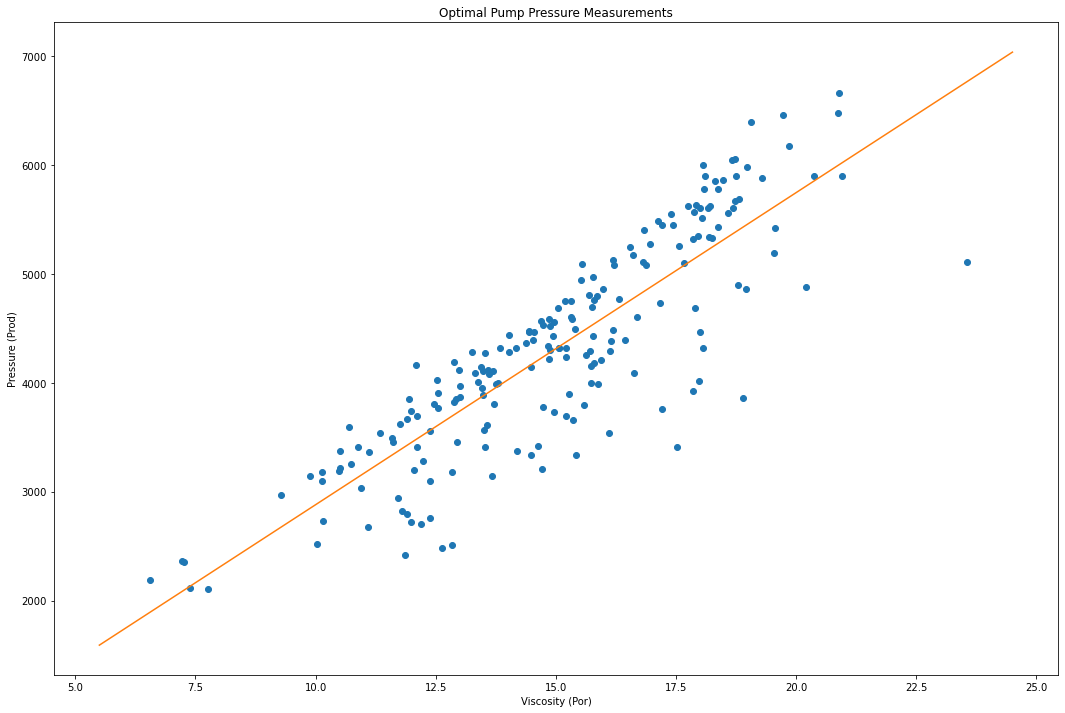

In [8]:
# Let's plot our data again, and overlay there the line we found
# As our x values range from 5 to 25, we just compute two points on the line, one at x=5.5 and the other at x=24.5 (we compute the predicted
# y for each, now that we have our thetas). The below code is ugly, but the goal is to show you what happens, even if you do not master python:
A1 = 5.5
B1 = int(th1_curr * A1 + th0_curr)
A2 = 24.5 
B2 = int(th1_curr * A2 + th0_curr)
P1 = [A1, A2]
P2 = [B1, B2]
# the same figure as before:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our line:
plt.plot(P1, P2)

In [9]:
# Now let's automate all this instead, by using scikit learn libraries, in particular the linear model:
from sklearn import linear_model
# let's create a linear regression object
reg = linear_model.LinearRegression()

In [10]:
# then all the training we did above is summarized in a single command, taking as parameters the x and y columns we train against:
reg.fit(df[['Por']],df[['Prod']])

LinearRegression()

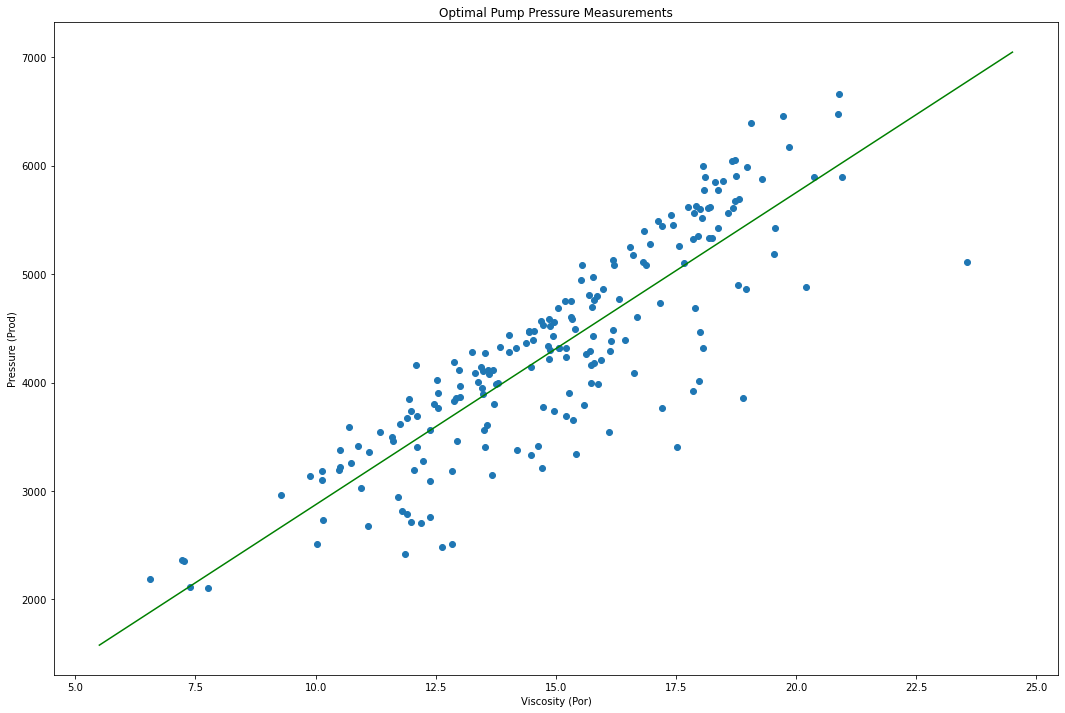

In [11]:
# All done. Let's plot the whole thing again:
plt.figure(figsize=(18,12))
plt.plot(df[['Por']], df[['Prod']], 'o')
plt.title("Optimal Pump Pressure Measurements")
plt.xlabel("Viscosity (Por)")
plt.ylabel("Pressure (Prod)")
# adding our predicted line, this time in green (again, there is  a better way, using this heavy handed for clarity):
A3 = 5.5
B3 = int(reg.predict([[A3]]))
A4 = 24.5 
B4 = int(reg.predict([[A4]]))
P3 = [A3, A4]
P4 = [B3, B4]
plt.plot(P3, P4, color = 'green')


In [12]:
# If you want to see the thetas, theta0 is called the intercept, and theta1 is called the coefficient:
int(reg.intercept_), int(reg.coef_)
# 1. What coefficient did you find?

(-2, 287)

In [13]:
# Last, if you want to run a prediction, you can use the same 'predict' command, for example suppose a new Por value:
New_Por = 8
#let's predict the presure for that Por:
reg.predict([[New_Por]])
# 2. What predicted value do you find?

array([[2299.30151175]])

In [14]:
# A good part of ML is trying to understand the data. Por is related to Prod, but it is also related to another parameter.
# Spend some time graphing Por as x against the other columns (as y), you will find one of them that also
# displays a linear relationship with Por. Besides Por (molecular porosity) and Prod (production output)
# that you already know, the set includes Perm (permeability, how well water can mix with the oil), AI
# (accoustic impedance, how well sound traverses the product), Brittle (brittleness of hard particles),
# TOC (total organic carbon), and VR (reflectance).
# 3. Which other linear relationship did you find to Por? Graph it and find the coefficient and the intercept. 

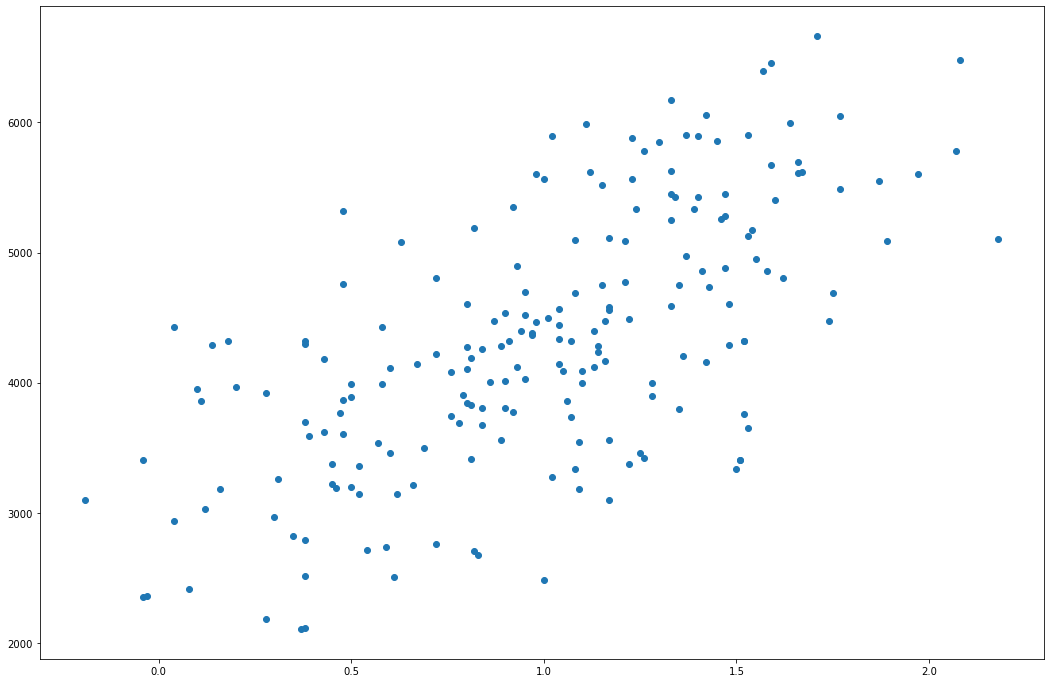

In [15]:
#Now let's try multivariate, also factoring TOC.
plt.figure(figsize=(18,12))
# A fist step is to look at if POC is also linear with Prod
plt.plot(df[['TOC']], df[['Prod']], 'o')

In [16]:
# It is linear, we can thus set our model with 2 variables
reg.fit(df[['Por', 'TOC']],df[['Prod']])

LinearRegression()

In [17]:
#Let's look at our coefficients and intercept:
int(reg.intercept_), reg.coef_
# 4. Which coefficient, intercept did you find?

(123, array([[268.06949486, 170.84028127]]))

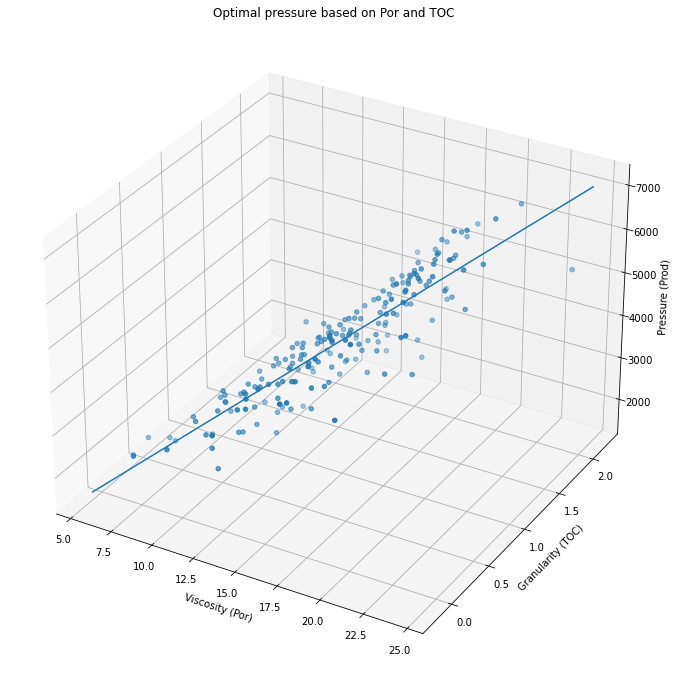

In [18]:
# syntax for 3-D projection
fig1 = plt.figure(figsize=(18,12))
ax = plt.axes(projection ='3d')
ax.scatter(df[['Por']], df[['TOC']], df[['Prod']])
ax.set_title('Optimal pressure based on Por and TOC')
ax.set_xlabel("Viscosity (Por)")
ax.set_ylabel("Granularity (TOC)")
ax.set_zlabel("Pressure (Prod)")
A5 = 5.5
B5 = -0.2
C5 = int(reg.predict([[A5, B5]]))
A6 = 24.5 
B6 = 2.2
C6 = int(reg.predict([[A6, B6]]))
P5 = [A5, A6]
P6 = [B5, B6]
P7 = [C5, C6]
ax.plot(P5, P6, P7)
plt.show()

In [19]:
# 5. Reproduce the same process with the other value that you found correlated to Por. Graph the relationship
# What coefficients and intercept did you find?

In [56]:
#Next, you may want to export your model
import joblib
# Save your model to a file - you should see that file in your working directory
joblib.dump(reg, 'my_cool_joblib_model')

['my_cool_joblib_model']

In [57]:
# How big is the model file? If it is 20Kb or less, it should fit onto an ESP 32.
# On your target IoT device running python, you can put that model file, then then load the model. I give it a different name than 'reg'
# so you can see how to call it:
mj = joblib.load('my_cool_joblib_model')

In [58]:
#Then you can use that model to predict values just like before:
mj.predict(([[5.5, -0.2]]))

array([[1563.55525311]])

Text(0, 0.5, '1 if pump could be reused, 0 if it was clogged')

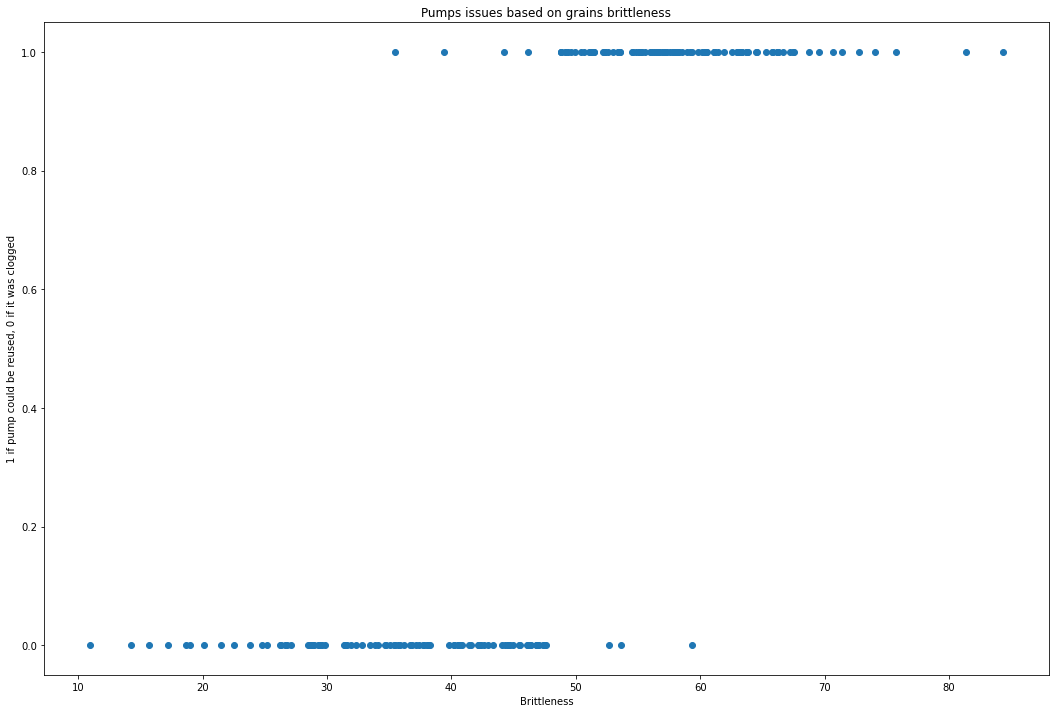

In [59]:
# We can also attempt to run logistic regression on this data. First, let's look at our data:
plt.figure(figsize=(18,12))
plt.plot(df[['Brittle']], df[['Reuse']], 'o')
plt.title("Pumps issues based on grains brittleness")
plt.xlabel("Brittleness")
plt.ylabel("1 if pump could be reused, 0 if it was clogged")

In [60]:
# For linear or logistic regression, it is good practice to split the data between training and test set. 
# Let's first do that, keeping 20% for testing:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['Brittle']], df.Reuse, train_size=0.8)

In [61]:
# Let's do logistic regression. We use directly the sklearn function:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
# Then we apply the function on our data, with the fit call:
model.fit(X_train, Y_train)

LogisticRegression()

In [63]:
# We can look at our theta coefficients:
 model.intercept_, model.coef_
# What coefficient and intercept did you find?

In [65]:
# We can then look at our test set, and run prediction on it:
X_test

In [67]:
# then you can predict which entries in the test set will be prediected for 1 and for 0.
# 6. How many are prediected for 1, and how many for 0?
 model.predict(X_test)

In [69]:
# We can also look at the probability values, instead of merely looking at the prediction (yes/no) result.
# The ouput displays the probability for 0 in the first column, and the probability for 1 in the second :
model.predict_proba(X_test)
# Is the output coherent with the prediction made above?

Text(0, 0.5, 'Status (0: clogged, 1: reused)')

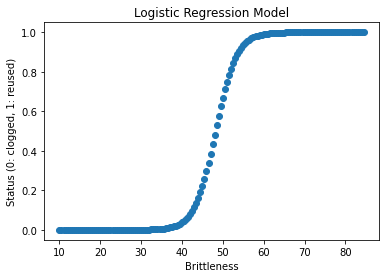

In [83]:
# to illustrate how the prediction works by projecting the probability onto a curve, we can generate
# brittleness values (from 10 to 85, by jumps of 0.5), then plot the prediction:
brittleness = np.arange(10, 85, 0.5)
probabilities= []
for i in brittleness:
    p_clogs = model.predict_proba([[i]])
    probabilities.append(p_clogs[:,1])
plt.scatter(brittleness,probabilities)
plt.title("Logistic Regression Model")
plt.xlabel('Brittleness')
plt.ylabel('Status (0: clogged, 1: reused)')

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df.shape

(200, 9)

In [21]:
X = df.values
X.shape

(200, 9)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [23]:
from sklearn. decomposition import PCA
pca_30 = PCA (n_components=30, random_state=2020)
pca_30.fit (X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [25]:
print ("Variance explained by all 30 principal components =",
sum (pca_30.explained_variance_ratio_ * 100))

Variance explained by all 30 principal components = 100.00000000000001


In [26]:
pca_30.explained_variance_ratio_ * 100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

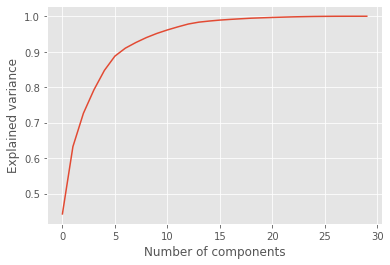

In [28]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ ))
plt.xlabel ('Number of components')
plt.ylabel ('Explained variance')
plt. savefig('elbow_plot.png', dpi=100)

In [31]:
print("Variance explained by the First principal component =",
np. cumsum(pca_30.explained_variance_ratio_ * 100)[0])
print ("Variance explained by the First 2 principal components =",
np. cumsum (pca_30.explained_variance_ratio_ * 100)[1])
print ("Variance explained by the First 3 principal components =",
np.cumsum(pca_30.explained_variance_ratio_* 100) [2])
print ("Variance explained by the First 10 principal components =",
np. cumsum (pca_30.explained_variance_ratio_ * 100) [9])

Variance explained by the First principal component = 44.27202560752635
Variance explained by the First 2 principal components = 63.24320765155943
Variance explained by the First 3 principal components = 72.6363709089908
Variance explained by the First 10 principal components = 95.15688143366668


In [36]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

In [40]:
pca_95 = PCA (n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

In [41]:
df_new = pd.DataFrame (X_pca_95, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_new['label'] = cancer.target
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0


In [22]:
df.head()

,Vessel,Por,Perm,AI,Brittle,TOC,VR,Prod,Reuse
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191,1
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,1
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574,1
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869,0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832,0
